In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
df=pd.read_csv("Titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Basic Analysis

In [5]:
df.shape

(891, 12)

In [6]:
print((df.memory_usage().sum()/(1024*1024)).round(2),"MB")

0.08 MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Values Check

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df.drop(columns="Cabin",inplace=True)

In [12]:
df.dropna(subset=['Embarked'],inplace=True)

## Resetting Index

In [13]:
df.set_index('PassengerId',inplace=True)

In [14]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Checking Imbalance

In [15]:
df['Survived'].value_counts()/len(df)*100

0    61.754781
1    38.245219
Name: Survived, dtype: float64

In [16]:
df['Num_family_members'] = df['SibSp']+df['Parch']

## Dropping Unnecessary columns

In [17]:
df.drop(columns=['Name','SibSp','Parch','Ticket'],inplace=True)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Num_family_members
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0


## Nominal Variables

In [19]:
nominal_cols = ['Sex','Embarked']

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
oh = OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first',dtype=int)

oh_df = pd.DataFrame(oh.fit_transform(df[nominal_cols]),
                     columns=oh.get_feature_names_out(nominal_cols),
                    index = df.index)
oh_df

,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,
1,1,0,1
2,0,0,0
3,0,0,1
4,0,0,1
5,1,0,1
...,...,...,...
887,1,0,1
888,0,0,1
889,0,0,1


In [22]:
df = pd.concat([df,oh_df],axis=1)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Num_family_members,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,male,22.0,7.2500,S,1,1,0,1
2,1,1,female,38.0,71.2833,C,1,0,0,0
3,1,3,female,26.0,7.9250,S,0,0,0,1
4,1,1,female,35.0,53.1000,S,1,0,0,1
5,0,3,male,35.0,8.0500,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,13.0000,S,0,1,0,1
888,1,1,female,19.0,30.0000,S,0,0,0,1
889,0,3,female,NaN,23.4500,S,3,0,0,1


In [23]:
df.drop(columns=nominal_cols,inplace=True)

In [24]:
df.head()

,Survived,Pclass,Age,Fare,Num_family_members,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,3,22.0,7.2500,1,1,0,1
2,1,1,38.0,71.2833,1,0,0,0
3,1,3,26.0,7.9250,0,0,0,1
4,1,1,35.0,53.1000,1,0,0,1
5,0,3,35.0,8.0500,0,1,0,1


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='Age'>

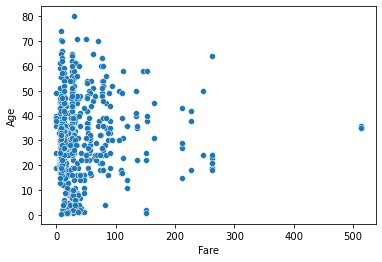

In [25]:
sns.scatterplot(df['Fare'],df['Age'])

In [26]:
df = df[df['Fare']<=300]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='Age'>

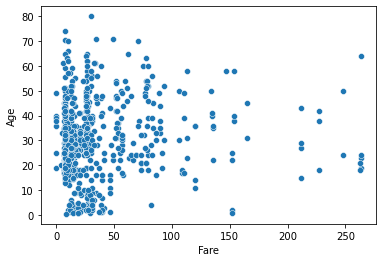

In [27]:
sns.scatterplot(df['Fare'],df['Age'])

In [28]:
df.head()

,Survived,Pclass,Age,Fare,Num_family_members,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,3,22.0,7.2500,1,1,0,1
2,1,1,38.0,71.2833,1,0,0,0
3,1,3,26.0,7.9250,0,0,0,1
4,1,1,35.0,53.1000,1,0,0,1
5,0,3,35.0,8.0500,0,1,0,1


In [29]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [30]:
X

,Pclass,Age,Fare,Num_family_members,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,3,22.0,7.2500,1,1,0,1
2,1,38.0,71.2833,1,0,0,0
3,3,26.0,7.9250,0,0,0,1
4,1,35.0,53.1000,1,0,0,1
5,3,35.0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...
887,2,27.0,13.0000,0,1,0,1
888,1,19.0,30.0000,0,0,0,1
889,3,NaN,23.4500,3,0,0,1


In [31]:
X.isna().mean()*100

Pclass                 0.000000
Age                   19.977427
Fare                   0.000000
Num_family_members     0.000000
Sex_male               0.000000
Embarked_Q             0.000000
Embarked_S             0.000000
dtype: float64

## Train test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [33]:
X_train.shape,y_train.shape

((708, 7), (708,))

In [34]:
X_test.shape,y_test.shape

((178, 7), (178,))

In [35]:
df['Survived'].value_counts()

0    549
1    337
Name: Survived, dtype: int64

## Base XGBoost Classifier

In [36]:
spw = df['Survived'].value_counts()[0]/df['Survived'].value_counts()[1]

In [37]:
spw

1.629080118694362

In [38]:
xgb = XGBClassifier(random_state=42,scale_pos_weight=spw)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [39]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))

Accuracy :  0.797752808988764
Precision :  0.7580645161290323
Recall :  0.6911764705882353
f1 score :  0.7230769230769231


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


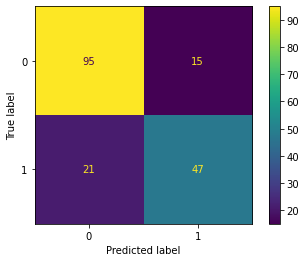

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,X_test,y_test)

In [41]:
metric_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','f1_Score'])

In [42]:
metric_df.loc[len(metric_df)] = (['Base XGBoost',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base XGBoost,0.797753,0.758065,0.691176,0.723077


## Hyperparameter tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)],
               'eta': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               "subsample":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "colsample_bytree":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "max_depth":[int(x) for x in np.linspace(2, 20, num = 10)],
               "min_child_weight":[int(x) for x in np.linspace(1, 20, num = 20)],
               "gamma" : [i/10.0 for i in range(0,6)],
               "scale_pos_weight" : [spw],
              "random_state":[42]}

xgb_gs = RandomizedSearchCV(XGBClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3,n_iter=50)
xgb_gs.fit(X_train, y_train)
xgb_gs.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'subsample': 0.9,
 'scale_pos_weight': 1.629080118694362,
 'random_state': 42,
 'n_estimators': 225,
 'min_child_weight': 7,
 'max_depth': 12,
 'gamma': 0.2,
 'eta': 0.1,
 'colsample_bytree': 0.9}

In [44]:
xgb_gs = XGBClassifier(
 subsample= 0.6,
 scale_pos_weight= 1.629080118694362,
 random_state= 42,
 n_estimators= 250,
 min_child_weight= 16,
 max_depth= 14,
 gamma= 0.4,
 eta= 0.35,
 colsample_bytree= 0.75)

xgb_gs.fit(X_train,y_train)
y_gs_pred = xgb_gs.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_gs_pred))
print("Precision : ",precision_score(y_test,y_gs_pred))
print("Recall : ",recall_score(y_test,y_gs_pred))
print("f1 score : ",f1_score(y_test,y_gs_pred))

Accuracy :  0.797752808988764
Precision :  0.75
Recall :  0.7058823529411765
f1 score :  0.7272727272727272


In [45]:
metric_df.loc[len(metric_df)] = (['XGB Optimized',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base XGBoost,0.797753,0.758065,0.691176,0.723077
1,XGB Optimized,0.797753,0.750000,0.705882,0.727273


In [46]:
feature_important = xgb_gs.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
fimp_df = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
fimp_df

,score
Age,208.0
Fare,189.0
Pclass,50.0
Num_family_members,37.0
Sex_male,37.0
Embarked_S,14.0


In [47]:
imp_features = list(fimp_df.index)
imp_features

['Age', 'Fare', 'Pclass', 'Num_family_members', 'Sex_male', 'Embarked_S']

In [48]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)],
               'eta': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               "subsample":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "colsample_bytree":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "max_depth":[int(x) for x in np.linspace(2, 20, num = 10)],
               "min_child_weight":[int(x) for x in np.linspace(1, 20, num = 20)],
               "gamma" : [i/10.0 for i in range(0,6)],
               "scale_pos_weight" : [spw],
              "random_state":[42]}

xgb_gs_imp_feat = RandomizedSearchCV(XGBClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
xgb_gs_imp_feat.fit(X_train[imp_features], y_train)
xgb_gs_imp_feat.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'subsample': 0.75,
 'scale_pos_weight': 1.629080118694362,
 'random_state': 42,
 'n_estimators': 300,
 'min_child_weight': 4,
 'max_depth': 8,
 'gamma': 0.1,
 'eta': 0.05,
 'colsample_bytree': 0.65}

In [49]:
xgb_gs_imp_feat = XGBClassifier(
 subsample= 0.95,
 scale_pos_weight= 1.629080118694362,
 random_state= 42,
 n_estimators= 100,
 min_child_weight= 3,
 max_depth= 2,
 gamma= 0.1,
 eta= 0.5,
 colsample_bytree= 0.5)

xgb_gs_imp_feat.fit(X_train[imp_features],y_train)

y_pred_imp_feat = xgb_gs_imp_feat.predict(X_test[imp_features])

print("Accuracy : ",accuracy_score(y_test,y_pred_imp_feat))
print("Precision : ",precision_score(y_test,y_pred_imp_feat))
print("Recall : ",recall_score(y_test,y_pred_imp_feat))
print("f1 score : ",f1_score(y_test,y_pred_imp_feat))

Accuracy :  0.797752808988764
Precision :  0.7352941176470589
Recall :  0.7352941176470589
f1 score :  0.735294117647059


In [50]:
metric_df.loc[len(metric_df)] = (['XGB Top Features',metrics.accuracy_score(y_test,y_pred_imp_feat),metrics.precision_score(y_test,y_pred_imp_feat)
                 ,metrics.recall_score(y_test,y_pred_imp_feat),metrics.f1_score(y_test,y_pred_imp_feat)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base XGBoost,0.797753,0.758065,0.691176,0.723077
1,XGB Optimized,0.797753,0.750000,0.705882,0.727273
2,XGB Top Features,0.797753,0.735294,0.735294,0.735294
